# Modelos de Regresion Lineal

#### Modelos con datos simulados y = b+wx

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Generar los predictores
x = 1.5 + 2.5*np.random.randn(100)

In [3]:
# Generar los errores
res = 0 + 0.8*np.random.randn(100)

In [4]:
# Generar las etiquetas predichas
y_pred = 5 + 1.9*x

In [5]:
# Etiquetas actuales
y_real = 5 + 1.9*x+res

In [6]:
X = x.tolist()
y = y_real.tolist()
y_predict = y_pred.tolist()

In [7]:
data = pd.DataFrame({
    "Predictores":X,
    "Etiqueta": y,
    "Predicciones": y_predict
})

data.head()

,Predictores,Etiqueta,Predicciones
0,2.090533,8.699610,8.972012
1,0.929500,8.139539,6.766050
2,-2.158782,0.664083,0.898315
3,1.742830,9.886390,8.311378
4,-1.938162,0.583014,1.317493


In [8]:
y_mean = [np.mean(data.Etiqueta) for i in range(1,len(data.Predictores)+1)]

Text(0.5, 1.0, 'Valor actual vs Predicciones')

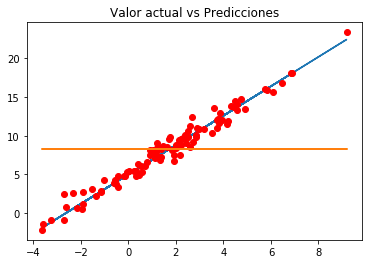

In [9]:
%matplotlib inline
plt.plot(data.Predictores, data.Predicciones)
plt.plot(data.Predictores, data.Etiqueta, 'ro')
plt.plot(data.Predictores, y_mean)
plt.title("Valor actual vs Predicciones")

In [10]:
#Investigar esto no lo comprendo bien
data['SSR'] = (data.Predictores-np.mean(data.Etiqueta))**2
data['SSD'] = (data.Predictores- data.Etiqueta)**2
data['SST'] = (data.Etiqueta - np.mean(data.Etiqueta))**2

SSR = sum(data.SSR)
SSD = sum(data.SSD)
SST = sum(data.SST)

In [11]:
SSR, SSD, SST

(4994.9882484681675, 4889.207993799759, 2158.3360580384174)

In [12]:
R2 = SSR/SST
R2

2.3142773479899206

In [13]:
data.head()

,Predictores,Etiqueta,Predicciones,SSR,SSD,SST
0,2.090533,8.699610,8.972012,38.005992,43.679908,0.197294
1,0.929500,8.139539,6.766050,53.669292,51.984659,0.013431
2,-2.158782,0.664083,0.898315,108.455863,7.968566,57.628589
3,1.742830,9.886390,8.311378,42.413990,66.317562,2.660021
4,-1.938162,0.583014,1.317493,103.909370,6.356326,58.866013


(array([ 1.,  0.,  2., 11., 14., 26., 17., 18.,  6.,  5.]),
 array([-14.20329592, -12.9283331 , -11.65337028, -10.37840747,
         -9.10344465,  -7.82848183,  -6.55351902,  -5.2785562 ,
         -4.00359338,  -2.72863057,  -1.45366775]),
 <a list of 10 Patch objects>)

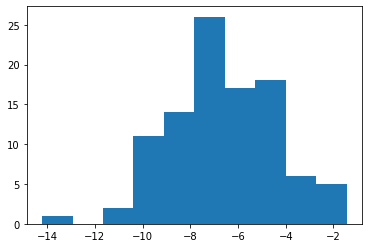

In [14]:
plt.hist(data.Predictores- data.Etiqueta)

# Opteniendo la recta de la regresion

In [15]:
X_mean = np.mean(data.Predictores)
y_mean = np.mean(data.Etiqueta)
X_mean, y_mean

(1.6368453635376958, 8.25543279001242)

In [16]:
data['beta_n'] = (data.Predictores - X_mean)*(data.Etiqueta-y_mean)
data['beta_d'] = (data.Predictores- X_mean)**2

In [17]:
beta = sum(data.beta_n)/sum(data.beta_d)

In [18]:
alpha = y_mean - beta*X_mean

In [19]:
alpha, beta

(5.239565333422251, 1.8424877045636174)

beta seria mi W o pendiente / alpha seria mi b o interseccion eje y

In [20]:
data["y_model"] = alpha + beta*data.Predictores

In [21]:
data.head()

,Predictores,Etiqueta,Predicciones,SSR,SSD,SST,beta_n,beta_d,y_model
0,2.090533,8.699610,8.972012,38.005992,43.679908,0.197294,0.201518,0.205832,9.091346
1,0.929500,8.139539,6.766050,53.669292,51.984659,0.013431,0.081977,0.500338,6.952158
2,-2.158782,0.664083,0.898315,108.455863,7.968566,57.628589,28.813932,14.406785,1.262037
3,1.742830,9.886390,8.311378,42.413990,66.317562,2.660021,0.172857,0.011233,8.450709
4,-1.938162,0.583014,1.317493,103.909370,6.356326,58.866013,27.428952,12.780676,1.668526


In [22]:
SSR = sum((data.y_model-y_mean)**2)
SSD = sum((data.y_model-data.Etiqueta)**2)
SST = sum((data.Etiqueta - y_mean)**2)

SSR, SSD, SST

(2085.8032339321203, 72.5328241062986, 2158.3360580384174)

In [23]:
R2 = SSR/SST
R2

0.9663941007536065

Text(0.5, 1.0, 'Valor actual vs Predicciones')

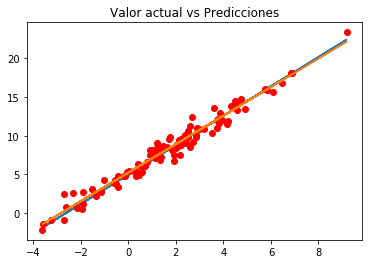

In [24]:
plt.plot(data.Predictores, data.Predicciones)
plt.plot(data.Predictores, data.Etiqueta, 'ro')
plt.plot(data.Predictores, data.y_model)
plt.title("Valor actual vs Predicciones")

# Error standar de los residuos (RSE)

Entre menor sea el RSE, mejor sera el modelo

In [25]:
RSE = np.sqrt(SSD/(len(data)-2))
RSE

0.8603085831418497

In [26]:
#Un 9% de error
RSE / np.mean(data.Etiqueta)

0.10421120309799715